#**Лабораторна робота №1 Системи DS.**
## Cистема прогнозування відтоку професійних кадрів української IT-компанії SoftServe.
*КМ-81, Геращенко Катерина.  
Розуміння бізнесу - розуміння даних. Підготовка даних для вирішення
конкретної задачі.*


# ***1.1 Розуміння бізнесу — розуміння даних:***






### 1.1.1 *Опис предметної області і постановка задачі*

*Предметна область*  
Склад професійної команди робітників IT-компанії.


---

*Клас задачі Data Science*  
Задача моделювання ризиків. Прогноз ризику контретного робітника залишити компанію в період наступних трьох місяців.


---
*Постановка задачі*  
Визначити причини і фактори, які впливають на рішення людини перейти до іншого роботодавця; змоделювати прогнозну модель, яка передбачає, чи є людина в зоні риску.

---
Відток кадрів завжди є досить важливим питанням для будь-якої організації, особливо в період її росту. Компанія SoftServe звертає велику увагу на прецеденти припинення співпраці за ініціативою найманого робітника. На кожну людину в організації витрачається достатньо великий бюджет на її найм, навчання та забезпечення необхідним обладнанням. Тому пошук нового претендента на позицію є менш бажаним, ніж переговори з поточним робітником з приводу покращень умов найму.

### 1.1.2 *Збір і вибір даних*

Збір сирих даних був проведений в рамках хакатону, проведеного компанією на платформі Kaggle [за посиланням](https://www.kaggle.com/c/softserve-ds-hackathon-2020/overview)  
Дані надані у csv файлах.

### *1.1.3  Збереження ресурсів даних*

Було вивантажено 2 файли з даними:

- `employees.csv` (Актуальна інформація щодо статусу найму робітників)
- `history.csv` (Історичні дані про найм робітників в період останніх 1.5 року, які збиралися з регулярністю 1 місяць)

### *1.1.4 Опис зібраного набору даних*

Надані компанією датасети детально описані на Kaggle. Опис мыстить наступну інформацію щодо полів датасету:

**Employee History**

EmployeeID - Employee identifier  
Date - Month of Employee Statistics gathering  
DevCenterID - Employee Location in terms of Company Geography  
SBUID - Employee Location in terms of Company Structure  
PositionID - Identifier of Employee Position (like QC Engineer, Development Consultant, etc)  
IsTrainee - Trainee flag of Employee  
LanguageLevelID - English Level Identifier (like Intermediate low, Upper-intermediate, etc)  
CustomerID - Client Identifier (one client may be related to the several projects)  
ProjectID - Employee Main Project Identifier  
IsInternalProject - Internal / External project flag  
Utilization - percent of Employee load on Non-Internal Projects during last month  
HourVacation - vacation hours are spent as on the last month  
HourMobileReserve - total hours in Mobile reserve as on the last month    
HourLockedReserve - total hours in Locked reserve as on the last month  
OnSide - was Employee involved to OnSite visit last month  
MonthOnPosition - month without position changing as on the last month  
MonthOnSalary - month without salary increasing as on the last month  
CompetenceGroupID - Employee Competency Group (like QC, Big Data, Data Science, etc)  
FunctionalOfficeID - Functional Office Identifier (like SDO, QMO, etc)  
PaymentTypeId - Payment with respect to the country-specifics employment    
WageGross - Compensation GROSS  
BonusOneTime - One Time Bonus  
APM - Employee APM  
PositionLevel - Employee Seniority Level (Junior, Middle, Senior, etc)  

**Information about Employee employment**

EmployeeID - Employee identifier  
HiringDate - Date of Hiring  
DismissalDate - Date of Dismissal

In [ ]:
import pandas as pd
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive"

%cd /content/gdrive/My Drive

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/My Drive


In [ ]:
!kaggle competitions download -c softserve-ds-hackathon-2020
!unzip \*.zip  && rm *.zip

employees.csv: Skipping, found more recently modified local copy (use --force to force download)
submission.csv: Skipping, found more recently modified local copy (use --force to force download)
history.csv.zip: Skipping, found more recently modified local copy (use --force to force download)
Archive:  history.csv.zip
  inflating: history.csv             


In [ ]:
history = pd.read_csv('history.csv')
history.Date = pd.to_datetime(history.Date)
history.head() 

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
0,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-07-01,3,292,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.7619,40,0,0,0,15,1,9,0,39,0.887446,1,1
1,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-08-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,1.0000,0,0,0,0,15,1,9,200,28,0.887446,2,2
2,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-09-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.5000,72,0,0,0,15,1,9,0,43,0.887446,3,3
3,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-10-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8636,16,0,0,0,15,1,9,0,49,0.887446,4,4
4,00116D71-E87D-4B64-A566-1F29B2A798A8,2017-11-01,3,332,70,2,0,11,893EA22F-08BE-4F11-AD93-C50746E4565F,7F97465B-ED3C-45DB-BE96-86C7E493F0CD,0,0.8000,8,0,0,0,15,1,9,0,43,0.887446,5,5


In [ ]:
employees = pd.read_csv('employees.csv')
employees.DismissalDate = pd.to_datetime(employees.DismissalDate)
employees.HiringDate = pd.to_datetime(employees.HiringDate)
employees.head()

,EmployeeID,HiringDate,DismissalDate
0,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-09-01,NaT
1,91C351D9-38A1-40CB-9B69-000774211859,2018-01-01,2019-02-01
2,D699327D-8A78-4FBE-9CEA-001355717D3F,2018-02-01,NaT
3,22102E27-5EEA-44F9-8632-0017B04B1236,2014-10-01,2018-05-01
4,08C0AFA9-ABC3-4FAF-8DE2-0018AE9A69F4,2010-09-01,NaT


In [ ]:
sample = employees.EmployeeID[0] 
employees[employees.EmployeeID == sample]

,EmployeeID,HiringDate,DismissalDate
0,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-09-01,NaT


In [ ]:
history[history.EmployeeID == sample]

,EmployeeID,Date,DevCenterID,SBUID,PositionID,PositionLevel,IsTrainee,LanguageLevelID,CustomerID,ProjectID,IsInternalProject,Utilization,HourVacation,HourMobileReserve,HourLockedReserve,OnSite,CompetenceGroupID,FunctionalOfficeID,PaymentTypeId,BonusOneTime,APM,WageGross,MonthOnPosition,MonthOnSalary
814,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-09-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,0,0,0,0,0,-1,21,110,0,0.279321,1,1
815,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-10-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,8,0,0,0,0,-1,22,110,0,0.262134,2,2
816,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-11-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,0,0,0,0,0,-1,22,540,0,0.255562,3,3
817,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2018-12-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,0,0,0,0,0,-1,22,380,0,0.255562,4,4
818,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2019-01-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,8,0,0,0,0,-1,22,313,0,0.255562,5,5
819,01EDC1A7-5DA7-4939-854B-0002E0DF548D,2019-02-01,8,255,891,2,0,9,2CAB77C6-1BF5-4FA8-957E-D8F5C7DED66F,9FFB72D5-B4BC-4D26-968A-9262A49BA0DA,1,0.0,40,0,0,0,0,-1,22,802,0,0.255562,6,6


Проміжок часу, за який зібрано дані

In [ ]:
history.Date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                   87766
unique                     20
top       2018-09-01 00:00:00
freq                     4721
first     2017-07-01 00:00:00
last      2019-02-01 00:00:00
Name: Date, dtype: object

Типи полів

In [ ]:
history.dtypes

EmployeeID                    object
Date                  datetime64[ns]
DevCenterID                    int64
SBUID                          int64
PositionID                     int64
PositionLevel                  int64
IsTrainee                      int64
LanguageLevelID                int64
CustomerID                    object
ProjectID                     object
IsInternalProject              int64
Utilization                  float64
HourVacation                   int64
HourMobileReserve              int64
HourLockedReserve              int64
OnSite                         int64
CompetenceGroupID              int64
FunctionalOfficeID             int64
PaymentTypeId                  int64
BonusOneTime                   int64
APM                            int64
WageGross                    float64
MonthOnPosition                int64
MonthOnSalary                  int64
dtype: object

Загальна кількість робітників за весь час

In [ ]:
employees.shape[0]

5373

Кількість робітників, які досі працюють

In [ ]:
hired_emplID = employees[employees.DismissalDate.isna()].EmployeeID
hired_emplID.shape[0]

4356

Кількість робітників, які звільнилися

In [ ]:
dismissed_emplID = employees[employees.DismissalDate.notna()].EmployeeID
dismissed_emplID.shape[0]

1017

Історія працівників, які досі працюють

In [ ]:
hired_empl_history = history[history.EmployeeID.isin(hired_emplID.values)].set_index(['EmployeeID', 'Date'])
hired_empl_history['IsHired'] = True
hired_empl_history

DevCenterID  ...  IsHired
EmployeeID                           Date                     ...         
00116D71-E87D-4B64-A566-1F29B2A798A8 2017-07-01            3  ...     True
                                     2017-08-01            3  ...     True
                                     2017-09-01            3  ...     True
                                     2017-10-01            3  ...     True
                                     2017-11-01            3  ...     True
...                                                      ...  ...      ...
FFF3B179-1D20-40FF-A330-A051BDF37301 2018-10-01            1  ...     True
                                     2018-11-01            1  ...     True
                                     2018-12-01            1  ...     True
                                     2019-01-01            1  ...     True
                                     2019-02-01            1  ...     True

[75763 rows x 23 columns]

Історія працівників, які звільнилися

In [ ]:
dismissed_empl_history = history[history.EmployeeID.isin(dismissed_emplID.values)].set_index(['EmployeeID', 'Date'])
dismissed_empl_history['IsHired'] = False
dismissed_empl_history

DevCenterID  ...  IsHired
EmployeeID                           Date                     ...         
001502BB-B61A-404D-8A99-CC5DE5A4F985 2017-07-01            1  ...    False
                                     2017-08-01            1  ...    False
                                     2017-09-01            1  ...    False
                                     2017-10-01            1  ...    False
                                     2017-11-01            1  ...    False
...                                                      ...  ...      ...
FFD9088A-0788-4BF0-ABCF-4D54E6CF31FC 2017-08-01            1  ...    False
                                     2017-09-01            1  ...    False
                                     2017-10-01            1  ...    False
                                     2017-11-01            1  ...    False
                                     2017-12-01            1  ...    False

[12003 rows x 23 columns]

### *1.1.5 Бізнес-профіль Еріксона-Пенкера*

#### *1.1.5.1 Документація бізнес-профілю Еріксона-Пенкера*



*   **бізнес-проблема  :**  спрогнозувати ризик звільнення найманого робітника IT-компанії протягом наступних 3 місяців.
*   **мета :** створити систему Data Science, а саме систему классифікації наявних робітників на тих, що у зоні ризику та без ризику звільнитися.
*   **процеси/фунції вирішення бізнес-проблеми :**  збір даних,очистка даних, обробка даних, аналіз даних,статистичний аналіз, алгоритми машинного навчання.  
* **ресурси для реалізації бізнес-процесів і вирішення бізнес-
проблеми :** файли, що містять історичну інформацію про найманих робітників з періодичністю 1 місяць протягом 1.5 року; інструменти мови програмування Python
* **бізнес-правила :** особливості та структура даних, що пов'язані саме зі сферою найму та відділу кадрів, методи отримання цих даних (враховуючи специфіку даної предметної області), самі особливості даної предметної області.



#### *1.1.5.2 Спрощений бізнес-профіль Еріксона-Пенкера. Діаграма класів нотації UML*

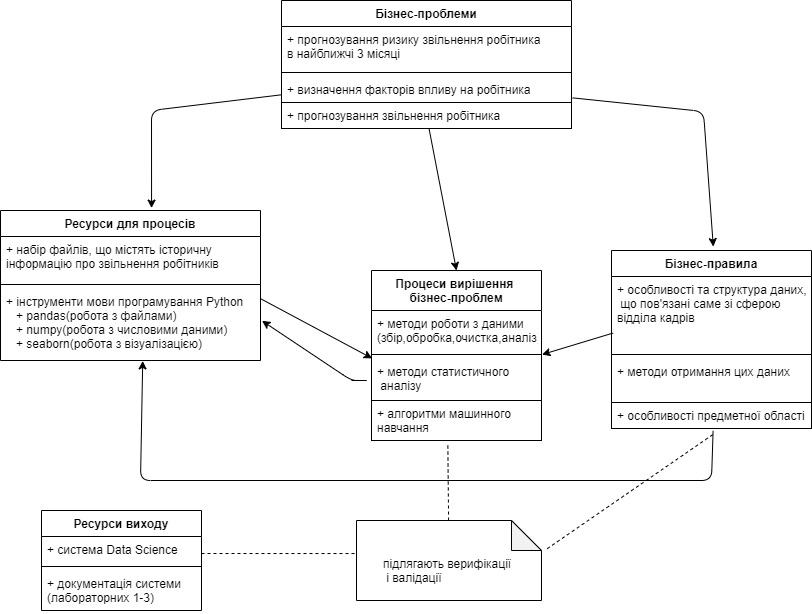

# ***1.2 Підготовка даних:***

### 1.2.1 *Первинна очистка даних*

В результаті детального розгляду даних на наявність дублікатів, неточностей та інших проблем, було зроблено висновок щодо повної чистоти даних, наданих організацією.

### 1.2.2 *Розвідувальний аналіз даних (EDA-Exploratory Data Analysis) та конструювання ознак*

Кількість робітників у розрізі основних полів

In [ ]:
countplot_columns = ['PositionLevel', 
                     'IsTrainee', 
                     'LanguageLevelID',
                     'IsInternalProject', 
                     'OnSite', 
                     'PaymentTypeId',
                     'FunctionalOfficeID',
                    ]

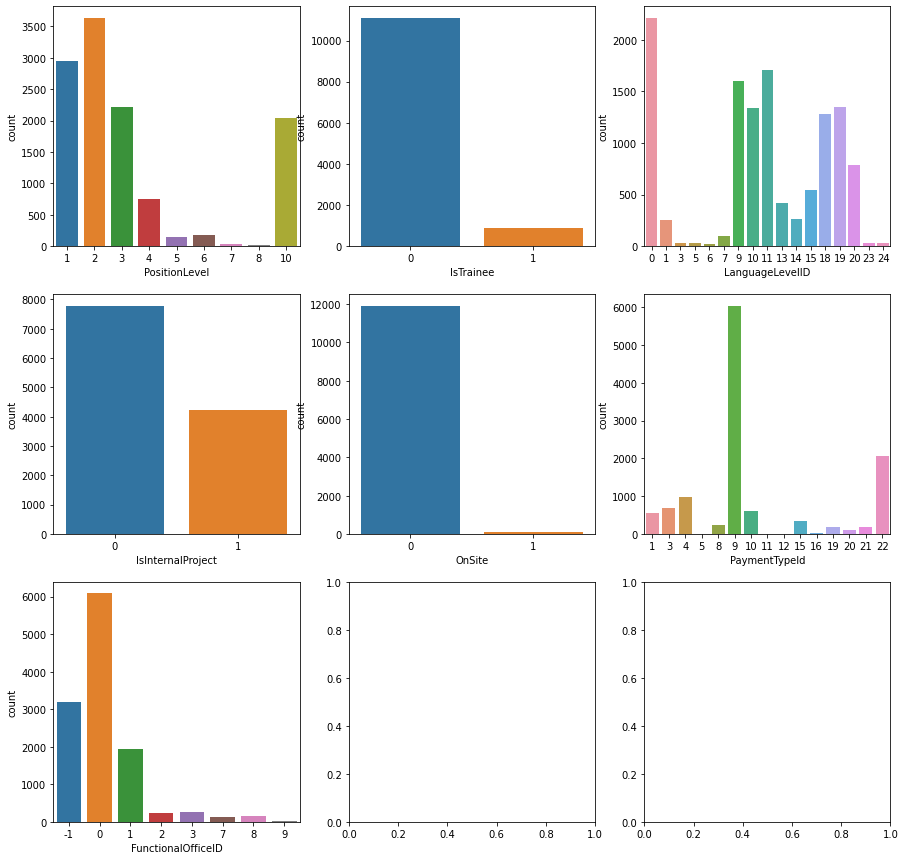

In [ ]:
fig, ax = plt.subplots(3, 3, figsize=(15, 15))
for idx, ax in enumerate(ax.flat):
    sns.countplot(x=countplot_columns[idx], data=dismissed_empl_history, ax=ax) #row=0, col=0
    if idx == 6:
        break
fig.show()

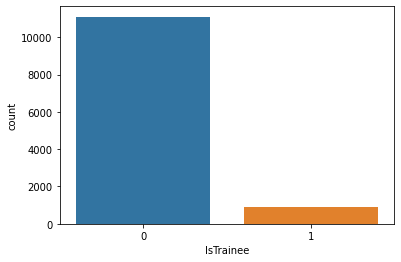

In [ ]:
hired_data = pd.concat([dismissed_empl_history, hired_empl_history])
sns.countplot(x='IsTrainee', data=dismissed_empl_history)

Кореляція між основними полями у розрізі працівників, які досі найняті, та тих, хто звільнився

<Figure size 720x576 with 0 Axes>

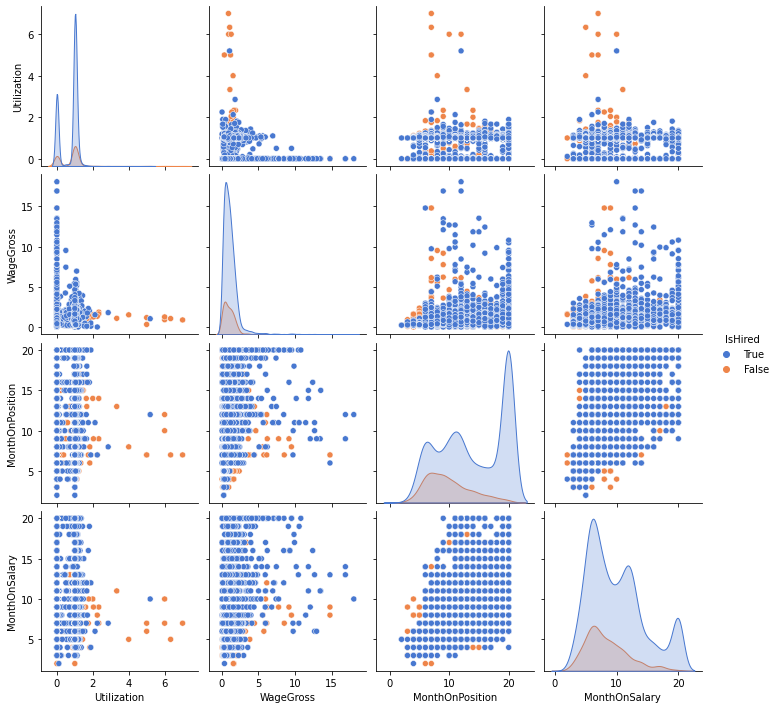

In [ ]:
paiplot_columns = ['IsHired', 'Utilization', 'WageGross', 'MonthOnPosition', 'MonthOnSalary']
paiplot_data = pd.concat([dismissed_empl_history[paiplot_columns].groupby('EmployeeID').max(),
                          hired_empl_history[paiplot_columns].groupby('EmployeeID').max()])

plt.figure(figsize=(10,8))
sns.pairplot(paiplot_data, hue = 'IsHired', hue_order=[True, False], palette = 'muted', diag_kind='kde', vars=paiplot_columns[1:])

# ***1.3 Верифікація і валідація:***

## *1.3.1 Верифікація :*

Перевіримо виконання основних вимог, наданих в даній лабораторній роботі.  

*   визначити предметну область для дослідження і попередньо
постановити задачу моделювання - виконано ;
*   зібрати сирі дані з будь-яких відкритих ресурсів - виконано;
*   зберегти ресурси даних - виконано;  
*   описати зібрані дані - виконано;
*   задокоментувати бізнес-профіль Еріксона-Пенкера - виконано;
*   очистити дані - виконано;  
*   провести розвідувальний аналіз даних - виконано;

Отже, всі вимоги до даної лаборатної вимоги були виконані.

## *1.3.2 Валідація :*

Під час виконання даної лабораторної роботи було виконано наступні вимоги :

*   зібрано,збережено і описано дані з метою використання їх для досягнення поставленої мети;
*   задокументовано бізнес-профіль Еріксона-Пенкера з метою визначення бізнес-проблеми,бізнес-правил,процесів для вирішення даної бізнес-проблем;
*  проведено розвідувальний аналіз даних з метою визначення характеристик , які впливають на розвиток сільського господарства;

# ***1.4 Висновки:***

Найголовніші висновки, які ми можемо вивести з даного аналізу:
1. Працівники звільняються в більшості на 8-9 місяці перебування на одній позиції.
2. Після подолання 10-місячного рубежу працівники все менш схильні звільнятися.
3. Рішення не залежить від зарплати, так як розподіл щільності зарплати за кар'єру розподілені однаково.